<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [2]:
#notice: Disable all warnings 
import warnings
warnings.filterwarnings('ignore')

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [3]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-10-29 17:23:13--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.001s  

2022-10-29 17:23:13 (37.4 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [8]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [9]:
df.shape

(346, 10)

Let's find the data column types and then we transfer the data to the right type

In [10]:
df.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

As it is shown, type of effective_Date and due_date are objects while we look for datetime format. Hence they need conversion. 

### Convert to date time object


In [11]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [12]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let’s see education group and their values

In [13]:
df['education'].value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

Let's see the statistical summary of two numerical columns

In [14]:
df[['age','Principal']].describe()

,age,Principal
count,346.000000,346.000000
mean,30.939306,943.641618
std,6.039418,109.425530
min,18.000000,300.000000
25%,27.000000,900.000000
50%,30.000000,1000.000000
75%,35.000000,1000.000000
max,51.000000,1000.000000


Let's find missing data in dataframe

In [15]:
missingdata = df.isnull()
missingdata.head(5)

for c in missingdata.columns.values.tolist():
    print(c)
    print(missingdata[c].value_counts())
    print("")

Unnamed: 0
False    346
Name: Unnamed: 0, dtype: int64

Unnamed: 0.1
False    346
Name: Unnamed: 0.1, dtype: int64

loan_status
False    346
Name: loan_status, dtype: int64

Principal
False    346
Name: Principal, dtype: int64

terms
False    346
Name: terms, dtype: int64

effective_date
False    346
Name: effective_date, dtype: int64

due_date
False    346
Name: due_date, dtype: int64

age
False    346
Name: age, dtype: int64

education
False    346
Name: education, dtype: int64

Gender
False    346
Name: Gender, dtype: int64



As it was shown above, there is no missing data so I can go the next stage.

Let's plot some columns to underestand data better:


In [16]:
# notice: installing seaborn might takes a few minutes
!pip install seaborn

Here I'm going to show Principal (the money that you originally agreed to pay back) vs gender (fe/male)

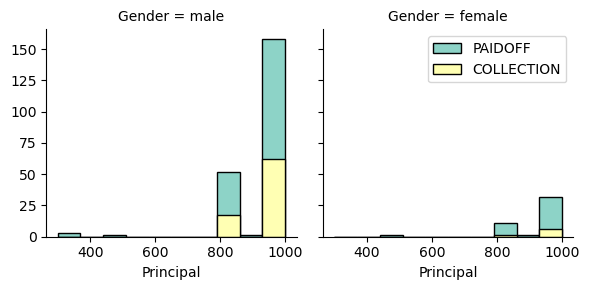

In [17]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 11)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set3", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

Here I'm going to show Age vs gender (fe/male)

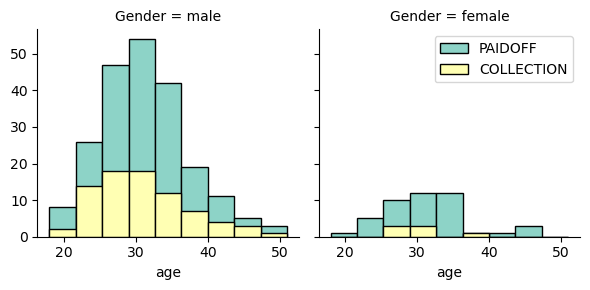

In [18]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set3", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

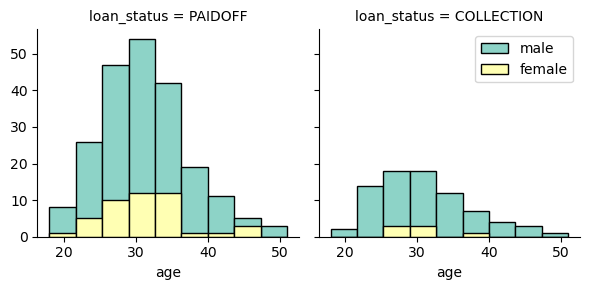

In [19]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="loan_status", hue="Gender", palette="Set3", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

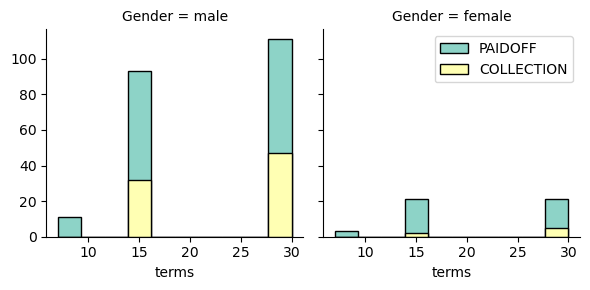

In [20]:
bins = np.linspace(df.terms.min(), df.terms.max(), 11)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set3", col_wrap=2)
g.map(plt.hist, 'terms', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


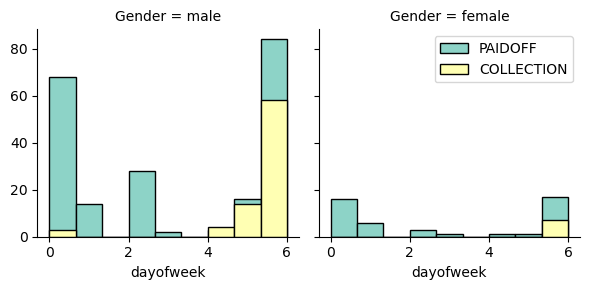

In [21]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set3", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [22]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [23]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [24]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [25]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [26]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [27]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [28]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [29]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

# Exploratory Data Analysis

I'm going to visualize the correlation between different features presented in Feature dataset.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'Principal'),
  Text(1.5, 0, 'terms'),
  Text(2.5, 0, 'age'),
  Text(3.5, 0, 'Gender'),
  Text(4.5, 0, 'weekend'),
  Text(5.5, 0, 'Bechalor'),
  Text(6.5, 0, 'High School or Below'),
  Text(7.5, 0, 'college')])

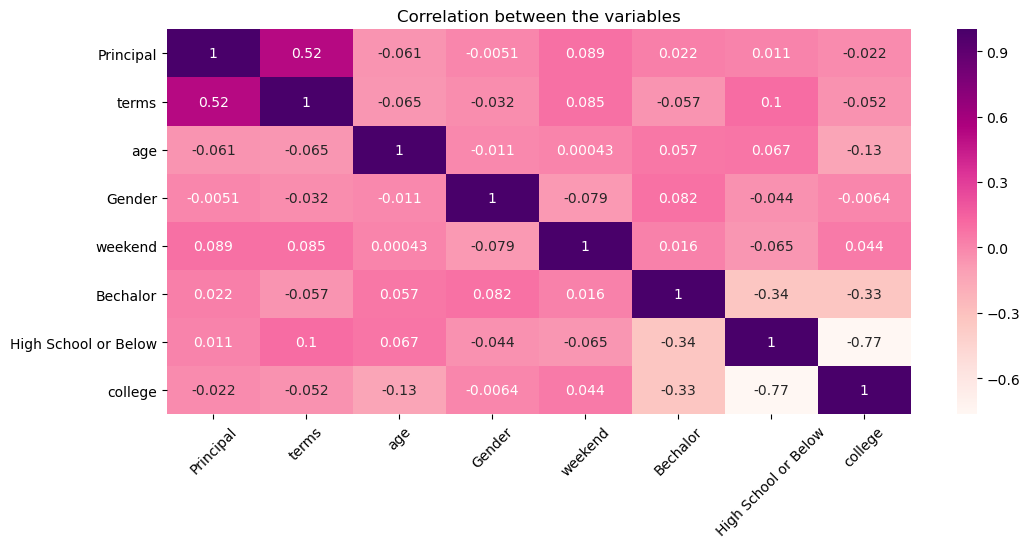

In [30]:
#correlation matrix and the heatmap
plt.subplots(figsize=(12,5))
data_correlation=Feature.corr()
sns.heatmap(data_correlation,annot=True,cmap='RdPu')
plt.title('Correlation between the variables')
plt.xticks(rotation=45)

I use a line plot to understand strongly(positively) correlated features, followed by weakly correlated features, and ultimately will look at negatively correlated features.

<AxesSubplot:xlabel='Principal', ylabel='terms'>

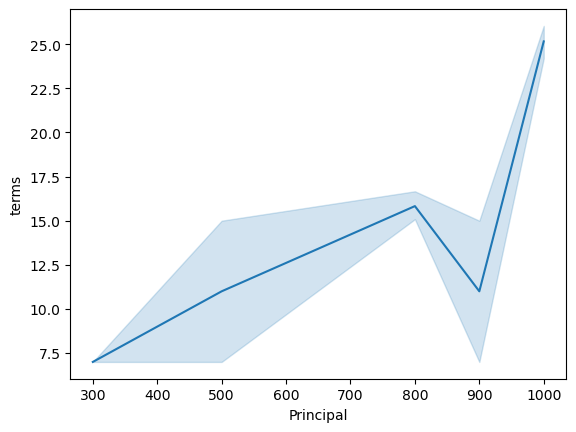

In [31]:
sns.lineplot(data=Feature, x="Principal", y="terms")

<AxesSubplot:xlabel='High School or Below', ylabel='college'>

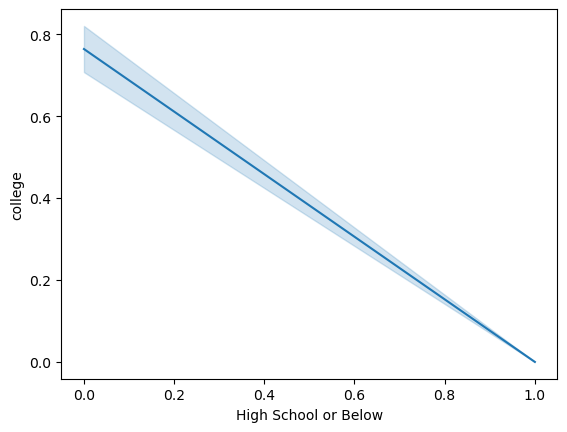

In [32]:
sns.lineplot(data=Feature, x="High School or Below", y="college")

## Normalize Data for Data Standardization


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [33]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import jaccard_similarity_score, f1_score

Let's split the data into train and test

In [35]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print("A portion of train data is shown as follows:")
print(X_train[0:5])


(276, 8) (70, 8) (276,) (70,)
A portion of train data is shown as follows:
[[ 0.51578458 -0.95911111  0.67333883 -0.42056004 -1.20577805 -0.38170062
  -0.87997669  1.14984679]
 [ 0.51578458  0.92071769 -0.81902922 -0.42056004  0.82934003 -0.38170062
   1.13639374 -0.86968108]
 [ 0.51578458  0.92071769  0.01006414 -0.42056004 -1.20577805 -0.38170062
  -0.87997669  1.14984679]
 [ 0.51578458 -0.95911111 -0.98484789 -0.42056004  0.82934003 -0.38170062
  -0.87997669  1.14984679]
 [ 0.51578458  0.92071769 -0.48739188 -0.42056004 -1.20577805 -0.38170062
  -0.87997669  1.14984679]]


To check KNeighborsClassifier, I create a loop over the number of neighbors and check the accuracy which is initially created as a list.

In [36]:
def _train_KNN(X_train, y_train, X_test, i):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,y_train)
    y_pred = KNN.predict(X_test)
    return y_pred

Text(0.5, 0, 'K')

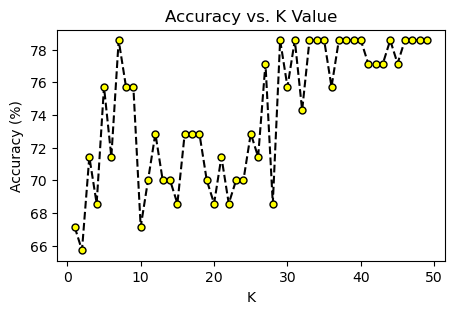

In [37]:
accuracy = []
error = []
K = 50 # Number of neighbors to use for kneighbors queries.
for i in range(1,K):
    y_pred = _train_KNN(X_train, y_train, X_test, i)
    error.append(np.mean(y_pred!=y_test)*100)
    accuracy.append(metrics.accuracy_score(y_pred,y_test)*100)

plt.figure(figsize=(5,3))
plt.plot(range(1,K),accuracy, color='black', linestyle='dashed', marker='o', markerfacecolor='yellow', markersize=5)
plt.title('Accuracy vs. K Value')
plt.ylabel('Accuracy (%)')
plt.xlabel('K')


Above figure shows that, lower error or higher accuracy is acheived when I use number of neigbours greater than 34 or 7. Let's do the same with a function so called GridSearchCV as follows. I consider cross-validation batch sizes cv = 5 in this example.

In [38]:
KNN = KNeighborsClassifier()
# Create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': np.arange(1, 50)}
# Use gridsearch to test all values for n_neighbors
KNN_gs = GridSearchCV(KNN, params_knn, cv=5, scoring='accuracy')
# fitting the model for grid search
gs = KNN_gs.fit(X_train, y_train)
# Save best model
KNN_best = gs.best_estimator_
# Check best n_neigbors value
print(KNN_gs.best_params_)

{'n_neighbors': 42}


Let's consider K = 7 and calculate confusion matrix and report:

In [39]:
y_pred = _train_KNN(X_train, y_train, X_test, i=7)
print('CONFUSION_MATRIX :\n')
print(confusion_matrix(y_pred,y_test))
print('\n')
print('REPORT :\n')
print(classification_report(y_pred, y_test))

CONFUSION_MATRIX :

[[ 6  6]
 [ 9 49]]


REPORT :

              precision    recall  f1-score   support

  COLLECTION       0.40      0.50      0.44        12
     PAIDOFF       0.89      0.84      0.87        58

   micro avg       0.79      0.79      0.79        70
   macro avg       0.65      0.67      0.66        70
weighted avg       0.81      0.79      0.79        70



### Let's check the accuracy of the model

In [40]:
metrics.accuracy_score(y_pred,y_test)

0.7857142857142857

Jaccard similarity coefficient score

In [41]:
jaccard_similarity_score(y_test, y_pred)

0.7857142857142857

F1_Score. balanced F-score or F-measure; this is interpreted as a harmonic mean of the precision and recall

In [42]:
f1_score(y_test, y_pred, average='weighted')

0.7766540244416351

# Decision Tree


In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
def _train_DT(X_train, y_train, X_test, i):
    # The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain
    DT = DecisionTreeClassifier(criterion="gini", max_depth = i)
    DT.fit(X_train, y_train)
    y_pred = DT.predict(X_test)
    return y_pred

I create a loop over the number of max depth of tree to check the accuracy of the model.

Text(0.5, 0, 'Max. Depth of the tree')

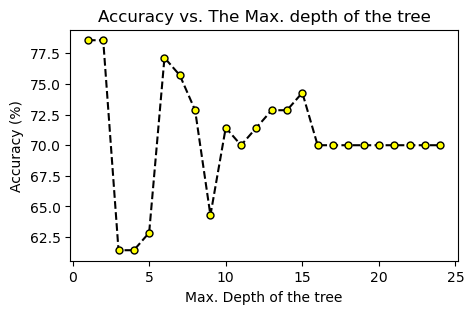

In [45]:
accuracy = []
error = []
D = 25 # The maximum depth of the tree.
for i in range(1,D):
    y_pred = _train_DT(X_train, y_train, X_test, i) # i is The maximum depth of the tree.
    error.append(np.mean(y_pred!=y_test)*100)
    accuracy.append(metrics.accuracy_score(y_pred,y_test)*100)

plt.figure(figsize=(5,3))
plt.plot(range(1,D),accuracy, color='black', linestyle='dashed', marker='o', markerfacecolor='yellow', markersize=5)
plt.title('Accuracy vs. The Max. depth of the tree')
plt.ylabel('Accuracy (%)')
plt.xlabel('Max. Depth of the tree')

In [46]:
y_pred = _train_DT(X_train, y_train, X_test, i=2)
print('CONFUSION_MATRIX :\n')
print(confusion_matrix(y_pred,y_test))
print('\n')
print('REPORT :\n')
print(classification_report(y_pred, y_test))

CONFUSION_MATRIX :

[[ 0  0]
 [15 55]]


REPORT :

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00         0
     PAIDOFF       1.00      0.79      0.88        70

   micro avg       0.79      0.79      0.79        70
   macro avg       0.50      0.39      0.44        70
weighted avg       1.00      0.79      0.88        70



### Let's check the accuracy of the model

In [47]:
metrics.accuracy_score(y_pred,y_test)

0.7857142857142857

Jaccard similarity coefficient score

In [48]:
jaccard_similarity_score(y_test, y_pred)

0.7857142857142857

F1_Score. balanced F-score or F-measure; this is interpreted as a harmonic mean of the precision and recall

In [49]:
f1_score(y_test, y_pred, average='weighted')

0.6914285714285714

# Support Vector Machine


In [50]:
from sklearn import svm

In [51]:
def _train_SVM(X_train, y_train, X_test, kernel):
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train)    
    y_pred = clf.predict(X_test)
    return y_pred

In [52]:
kernel = "linear" # kernel = linear, poly, rbf, sigmoid, precomputed
                  # rbf: radial basis function (RBF),
                  # poly: Polynomial
                  # linear
y_pred = _train_SVM(X_train, y_train, X_test, kernel)

In [53]:
print('CONFUSION_MATRIX :\n')
print(confusion_matrix(y_pred,y_test))
print('\n')
print('REPORT :\n')
print(classification_report(y_pred, y_test))

CONFUSION_MATRIX :

[[ 0  0]
 [15 55]]


REPORT :

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00         0
     PAIDOFF       1.00      0.79      0.88        70

   micro avg       0.79      0.79      0.79        70
   macro avg       0.50      0.39      0.44        70
weighted avg       1.00      0.79      0.88        70



### Let's check the accuracy of the model

In [54]:
metrics.accuracy_score(y_pred,y_test)

0.7857142857142857

Jaccard similarity coefficient score

In [55]:
jaccard_similarity_score(y_test, y_pred)

0.7857142857142857

F1_Score. balanced F-score or F-measure; this is interpreted as a harmonic mean of the precision and recall

In [56]:
f1_score(y_test, y_pred, average='weighted')

0.6914285714285714

# Logistic Regression


In [57]:
from sklearn.linear_model import LogisticRegression

In [78]:
def _train_LR(X_train, y_train, X_test, solver):
    LR = LogisticRegression(C=1.0, solver= solver).fit(X_train,y_train)  #lbfgs
    y_pred = LR.predict(X_test)
    return y_pred

In [97]:
def _train_LR_(X_train, y_train, X_test, solver):
    LR = LogisticRegression(C=1.0, solver= solver).fit(X_train,y_train)
    return LR

In [99]:
solver = 'liblinear'    # liblinear
                        # lbfgs
                        # newton-cg 
                        # sag 
                        # saga
y_pred = _train_LR(X_train, y_train, X_test, solver)

LR = LogisticRegression(C=1.0, solver= solver).fit(X_train,y_train)
y_pred_prob = LR.predict_proba(X_test) # Probability estimates

array([[0.52329119, 0.47670881],
       [0.39312075, 0.60687925],
       [0.02860977, 0.97139023],
       [0.04250212, 0.95749788]])

In [80]:
print('CONFUSION_MATRIX :\n')
print(confusion_matrix(y_pred,y_test))
print('\n')
print('REPORT :\n')
print(classification_report(y_pred, y_test))

CONFUSION_MATRIX :

[[ 2  7]
 [13 48]]


REPORT :

              precision    recall  f1-score   support

  COLLECTION       0.13      0.22      0.17         9
     PAIDOFF       0.87      0.79      0.83        61

   micro avg       0.71      0.71      0.71        70
   macro avg       0.50      0.50      0.50        70
weighted avg       0.78      0.71      0.74        70



### Let's check the accuracy of the model

In [60]:
metrics.accuracy_score(y_pred,y_test)

0.7142857142857143

Jaccard similarity coefficient score

In [61]:
jaccard_similarity_score(y_test, y_pred)

0.7142857142857143

F1_Score. balanced F-score or F-measure; this is interpreted as a harmonic mean of the precision and recall

In [62]:
f1_score(y_test, y_pred, average='weighted')

0.685960591133005

# Model Evaluation using Test set


In [92]:
#!pip install jaccard-index
from sklearn.metrics import jaccard_similarity_score, f1_score, log_loss

First, download and load the test set:


In [67]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-10-29 17:31:37--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2022-10-29 17:31:37 (15.0 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation and data processing

In [68]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


#### Convert datetime

In [69]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


#### Feature extraction

In [70]:
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

#### Convert categorial features to nimnal values

In [71]:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

#### One Hot feature

In [72]:
test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1,inplace=True)
test_Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


#### Feature selection

In [76]:
X_TEST = test_Feature
X_TEST[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [77]:
Y_TEST = test_df['loan_status'].values
Y_TEST[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

#### Normalizing data 

In [81]:
X_TEST= preprocessing.StandardScaler().fit(X_TEST).transform(X_TEST)
X_TEST[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677]])

#### KNN

In [103]:
y_pred_KNN = _train_KNN(X_train, y_train, X_TEST, i=7)
print('Jaccard: ' , jaccard_similarity_score(Y_TEST, y_pred_KNN))
print('F1-score: ',f1_score(Y_TEST, y_pred_KNN, average='weighted'))

Jaccard:  0.6666666666666666
F1-score:  0.6328400281888654


#### Decision TREE

In [104]:
y_pred_DT = _train_DT(X_train, y_train, X_TEST, i=2)
print('Jaccard: ' , jaccard_similarity_score(Y_TEST, y_pred_DT))
print('F1-score: ',f1_score(Y_TEST, y_pred_DT, average='weighted'))

Jaccard:  0.7407407407407407
F1-score:  0.6304176516942475


#### SVM

In [105]:
y_pred_SVM = _train_SVM(X_train, y_train, X_TEST, kernel)
print('Jaccard: ' , jaccard_similarity_score(Y_TEST, y_pred_SVM))
print('F1-score: ',f1_score(Y_TEST, y_pred_SVM, average='weighted'))

Jaccard:  0.7407407407407407
F1-score:  0.6304176516942475


#### Logistic Regression

In [106]:
y_pred_LR = _train_LR(X_train, y_train, X_TEST, solver)
print('Jaccard: ' , jaccard_similarity_score(Y_TEST, y_pred_LR))
print('F1-score: ', f1_score(Y_TEST, y_pred_LR, average='weighted'))

Jaccard:  0.7592592592592593
F1-score:  0.6959228135698723


In [107]:
Y_pred_prob = LR.predict_proba(X_TEST)
print('LogLoss: ',log_loss(Y_TEST, Y_pred_prob))

LogLoss:  0.46899782059214623


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | 0.66       | 0.633        | NA      |
| Decision Tree      | 0.74       | 0.63        | NA      |
| SVM                | 0.74       | 0.63        | NA      |
| LogisticRegression | 0.76       | 0.696        | 0.47       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
